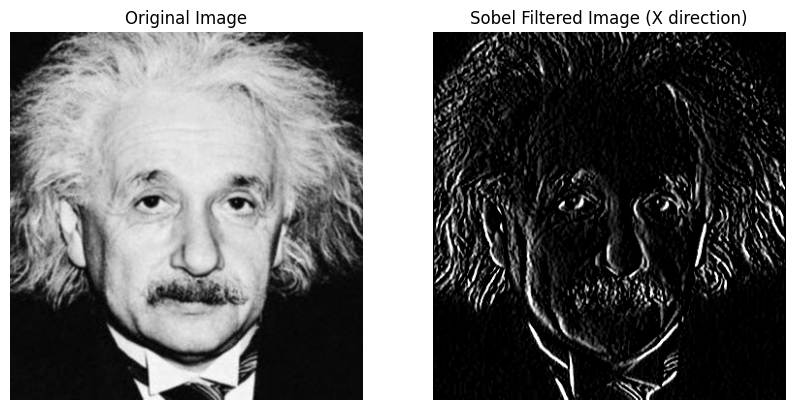

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

albert_img = cv.imread("a1images/einstein.png", cv.IMREAD_GRAYSCALE)
albert_img.shape

# Define a Sobel filter kernel (for detecting edges in x direction)
sobel_kernel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

# Apply the Sobel filter using filter2D function
sobel_x = cv.filter2D(albert_img, -1, sobel_kernel_x)

# Display the original image and the Sobel filtered image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(albert_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel Filtered Image (X direction)')
plt.axis('off')

plt.show()


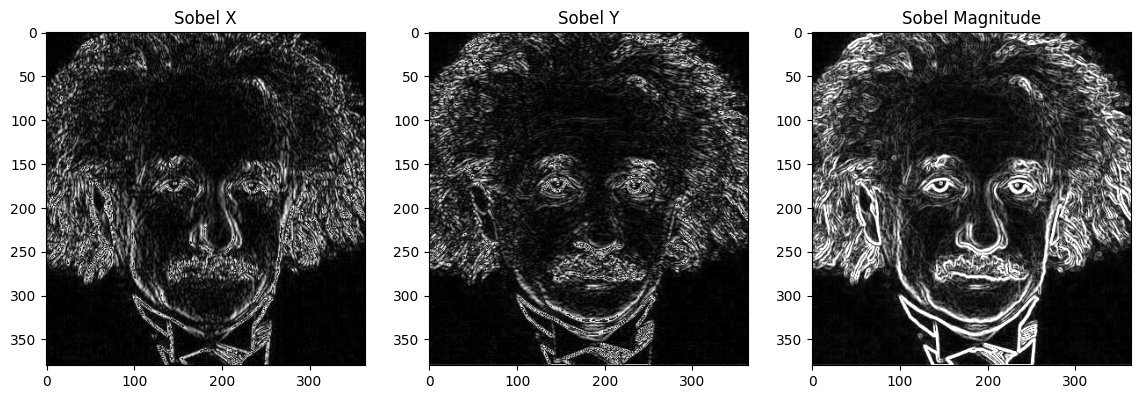

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [6]:
# Get image dimensions
height, width = albert_img.shape

# Define Sobel kernels
sobel_kernel_x = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

sobel_kernel_y = np.array([[1, 2, 1],
                           [ 0,  0,  0],
                           [ -1, -2,  -1]])

# Initialize empty arrays to store results
sobel_x = np.zeros_like(albert_img, dtype=np.float64)
sobel_y = np.zeros_like(albert_img, dtype=np.float64)

# Padding the image to handle the edges
padded_img = np.pad(albert_img, ((1, 1), (1, 1)), mode='constant')

# Perform convolution with the Sobel kernel manually
for i in range(1, height+1):
    for j in range(1, width+1):
        # Extract the 3x3 region from the padded image
        region = padded_img[i-1:i+2, j-1:j+2]
        
        # Apply the Sobel kernels
        gx = np.sum(sobel_kernel_x * region)
        gy = np.sum(sobel_kernel_y * region)
        
        # Store the result in the output arrays
        sobel_x[i-1, j-1] = gx
        sobel_y[i-1, j-1] = gy

# Combine the horizontal and vertical Sobel results to get the gradient magnitude
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.clip(sobel_magnitude, 0, 255)  # Clip values to valid range

# Convert the result back to uint8 format
sobel_x = np.uint8(np.abs(sobel_x))
sobel_y = np.uint8(np.abs(sobel_y))
sobel_magnitude = np.uint8(sobel_magnitude)

# Plotting the results
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')

plt.subplot(1, 3, 3)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Magnitude')

plt.show()

print(sobel_kernel_x)

In [7]:
# Define the 1D Sobel kernels (separable)
sobel_kernel_v = np.array([1, 2, 1])  # Vertical 1D kernel (for smoothing)
sobel_kernel_h = np.array([1, 0, -1])  # Horizontal 1D kernel (for edge detection)

# Initialize empty arrays to store intermediate and final results
sobel_x_intermediate = np.zeros_like(albert_img, dtype=np.float64)
sobel_x = np.zeros_like(albert_img, dtype=np.float64)

# Padding the image to handle the edges (for 1D vertical filter)
padded_img = np.pad(albert_img, ((1, 1), (0, 0)), mode='constant')

# Step 1: Apply vertical 1D kernel (along the rows)
for i in range(1, height+1):
    for j in range(0, width):
        # Apply the vertical kernel to the 3-pixel neighborhood in the column
        sobel_x_intermediate[i-1, j] = np.sum(padded_img[i-1:i+2, j] * sobel_kernel_v)

# Padding the intermediate result for horizontal filtering
padded_intermediate = np.pad(sobel_x_intermediate, ((0, 0), (1, 1)), mode='constant')

# Step 2: Apply horizontal 1D kernel (along the columns)
for i in range(0, height):
    for j in range(1, width+1):
        # Apply the horizontal kernel to the 3-pixel neighborhood in the row
        sobel_x[i, j-1] = np.sum(padded_intermediate[i, j-1:j+2] * sobel_kernel_h)

# Convert the result back to uint8 format, normalizing the values to 0-255
sobel_x = np.uint8(np.clip(np.abs(sobel_x), 0, 255))

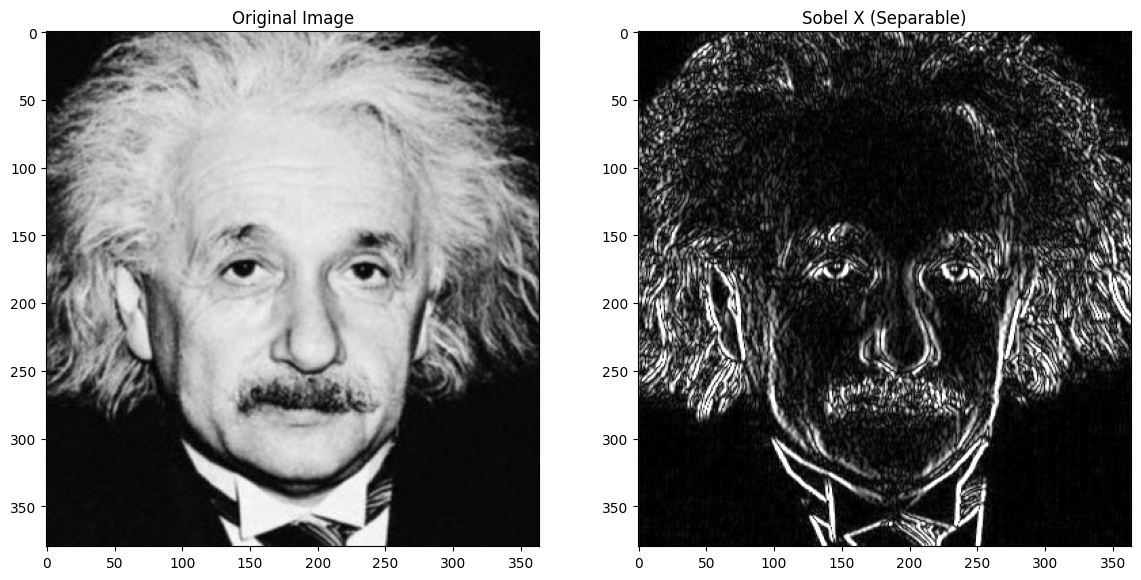

In [8]:

# Plotting the results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(albert_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X (Separable)')

plt.show()
